# target selection using HSC photo-$z$s

In [1]:
import os
import numpy as np 
import astropy.table as aTable

In [2]:
import corner as DFM

In [3]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
gals = aTable.Table.read('/Users/chahah/data/pfs/hsc_pdr3_galaxies.fits')
stars = aTable.Table.read('/Users/chahah/data/pfs/hsc_pdr3_stars.fits')

In [5]:
elcosmos = aTable.Table.read('/Users/chahah/data/pfs/combinedcatalog_flux_SNR-cos_full_phy_fz-a0.20_OI15config_added-Re_yfixed_SNROIIv2021.fits')

Text(0, 0.5, 'Dec')

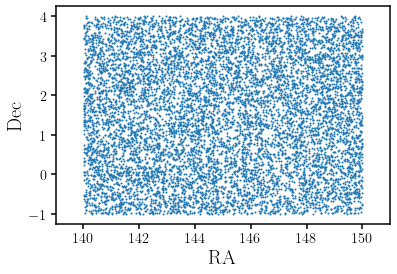

In [6]:
plt.scatter(gals['ra'][::1000], gals['dec'][::1000], s=1)
plt.xlabel('RA', fontsize=20)
plt.xlim(139, 151)
plt.ylabel('Dec', fontsize=20)

## [OII] SN

Text(0, 0.5, '[OII] SNR')

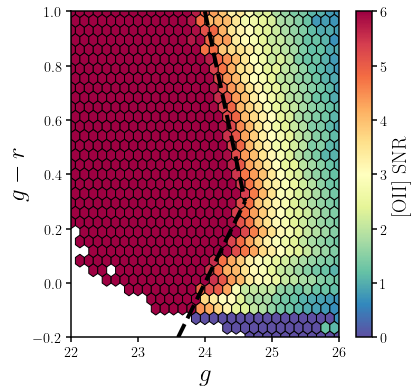

In [7]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
hb = sub.hexbin(elcosmos['g_hsc'], (elcosmos['g_hsc'] - elcosmos['r_hsc']), 
                C=elcosmos['SNR_PFS_OII'], reduce_C_function=np.median,
                extent=(22, 26, -0.2, 1.), vmin=0., vmax=6,
                gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=1.)
sub.set_xlabel('$g$', fontsize=25)
sub.set_xlim(22, 26)
sub.set_ylabel('$g-r$', fontsize=25)
sub.set_ylim(-0.2, 1)

sub.plot([23.6, 24.6], [-0.2, 0.3], c='k', ls='--', lw=4)
sub.plot([24.0, 24.6], [1.0, 0.3], c='k', ls='--', lw=4)
cbar = fig.colorbar(hb)
cbar.ax.set_ylabel(r'[OII] SNR', fontsize=20)

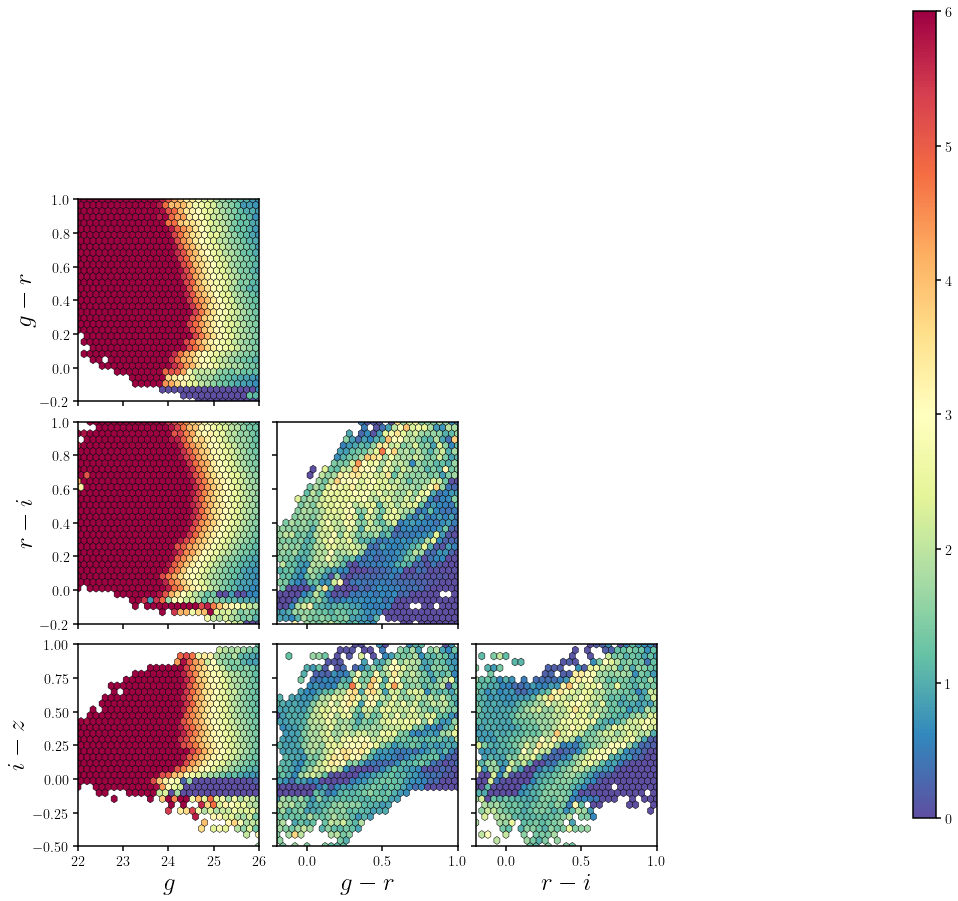

In [8]:
ranges = [(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)]
labels = ['$g$', '$g-r$', '$r-i$', '$i-z$']

_data = np.array([elcosmos['g_hsc'], 
                  (elcosmos['g_hsc'] - elcosmos['r_hsc']),
                  (elcosmos['r_hsc'] - elcosmos['i_hsc']), 
                  (elcosmos['i_hsc'] - elcosmos['z_hsc'])])

fig = plt.figure(figsize=(16, 16))
for j in range(4): 
    for i in range(4): 
        if i > j: 
            sub = fig.add_subplot(4,4,4*i+j+1)
            hb = sub.hexbin(_data[j], _data[i], 
                            C=elcosmos['SNR_PFS_OII'], reduce_C_function=np.median,
                            extent=(ranges[j][0], ranges[j][1], ranges[i][0], ranges[i][1]), 
                            vmin=0., vmax=6., 
                            gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=0.5)
            sub.set_xlim(ranges[j][0], ranges[j][1])
            if j != 0: sub.set_yticklabels([])
            else: sub.set_ylabel(labels[i], fontsize=25)                
            if i < 3: sub.set_xticklabels([])
            else: sub.set_xlabel(labels[j], fontsize=25)
            sub.set_ylim(ranges[i][0], ranges[i][1])
fig.subplots_adjust(hspace=0.1, wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)

## star vs galaxies

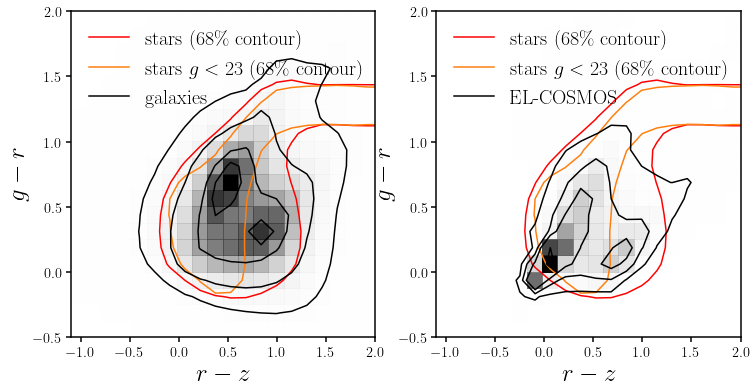

In [9]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
DFM.hist2d(stars['r_kronflux_mag'] - stars['z_kronflux_mag'], stars['g_kronflux_mag'] - stars['r_kronflux_mag'], 
           levels=[0.683], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='r', 
           plot_datapoints=False, plot_density=False, 
           ax=sub)
DFM.hist2d((stars['r_kronflux_mag'] - stars['z_kronflux_mag'])[stars['g_kronflux_mag'] < 23], 
           (stars['g_kronflux_mag'] - stars['r_kronflux_mag'])[stars['g_kronflux_mag'] < 23], 
           levels=[0.683], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='C1', 
           plot_datapoints=False, plot_density=False, 
           ax=sub)
DFM.hist2d(gals['r_kronflux_mag'] - gals['z_kronflux_mag'], gals['g_kronflux_mag'] - gals['r_kronflux_mag'], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], 
           plot_datapoints=False,
           ax=sub)

sub.plot([], [], c='r', label=r'stars (68\% contour)')
sub.plot([], [], c='C1', label=r'stars $g < 23$ (68\% contour)')
sub.plot([], [], c='k', label='galaxies')
sub.set_xlabel('$r-z$', fontsize=25)
sub.set_ylabel('$g-r$', fontsize=25)
sub.legend(loc='upper left', fontsize=20)

sub = fig.add_subplot(122)
DFM.hist2d(stars['r_kronflux_mag'] - stars['z_kronflux_mag'], stars['g_kronflux_mag'] - stars['r_kronflux_mag'], 
           levels=[0.683], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='r', 
           plot_datapoints=False, plot_density=False, 
           ax=sub)
DFM.hist2d((stars['r_kronflux_mag'] - stars['z_kronflux_mag'])[stars['g_kronflux_mag'] < 23], 
           (stars['g_kronflux_mag'] - stars['r_kronflux_mag'])[stars['g_kronflux_mag'] < 23], 
           levels=[0.683], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='C1', 
           plot_datapoints=False, plot_density=False, 
           ax=sub)
DFM.hist2d(elcosmos['r_hsc'] - elcosmos['z_hsc'], elcosmos['g_hsc'] - elcosmos['r_hsc'], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], 
           plot_datapoints=False,
           ax=sub)

sub.plot([], [], c='r', label=r'stars (68\% contour)')
sub.plot([], [], c='C1', label=r'stars $g < 23$ (68\% contour)')
sub.plot([], [], c='k', label='EL-COSMOS')
sub.set_xlabel('$r-z$', fontsize=25)
sub.set_ylabel('$g-r$', fontsize=25)
sub.legend(loc='upper left', fontsize=20)

the stellar locus is significantly broader than in DESI because HSC goes down to much fainter

## $0.6 < z < 2.4$ galaxy selection

In [10]:
zlim0 = (gals['photoz_best'] < 0.6)
zlim1 = (gals['photoz_best'] > 0.6) & (gals['photoz_best'] < 1.5)
zlim2 = (gals['photoz_best'] > 1.5) & (gals['photoz_best'] < 2.4)
zlim3 = (gals['photoz_best'] > 2.4)
print('0.0 < z < 0.6 %.2f' % np.mean(zlim0))
print('0.6 < z < 1.5 %.2f' % np.mean(zlim1))
print('1.5 < z < 2.4 %.2f' % np.mean(zlim2))
print('2.4 < z %.2f' % np.mean(zlim3))

0.0 < z < 0.6 0.20
0.6 < z < 1.5 0.49
1.5 < z < 2.4 0.16
2.4 < z 0.14


In [11]:
zlim0_elc = (elcosmos['z_photo'] < 0.6)
zlim1_elc = (elcosmos['z_photo'] > 0.6) & (elcosmos['z_photo'] < 1.5)
zlim2_elc = (elcosmos['z_photo'] > 1.5) & (elcosmos['z_photo'] < 2.4)
zlim3_elc = (elcosmos['z_photo'] > 2.4)
print('0.0 < z < 0.6 %.2f' % np.mean(zlim0_elc))
print('0.6 < z < 1.5 %.2f' % np.mean(zlim1_elc))
print('1.5 < z < 2.4 %.2f' % np.mean(zlim2_elc))
print('2.4 < z %.2f' % np.mean(zlim3_elc))

0.0 < z < 0.6 0.20
0.6 < z < 1.5 0.39
1.5 < z < 2.4 0.22
2.4 < z 0.19


Text(0.5, 1.0, 'EL-COSMOS')

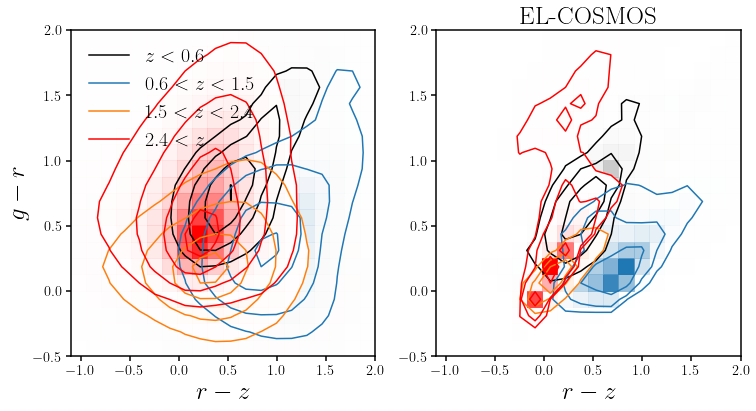

In [12]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)

DFM.hist2d((gals['r_kronflux_mag'] - gals['z_kronflux_mag'])[zlim0], 
           (gals['g_kronflux_mag'] - gals['r_kronflux_mag'])[zlim0], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='k',
           plot_datapoints=False,
           ax=sub)

DFM.hist2d((gals['r_kronflux_mag'] - gals['z_kronflux_mag'])[zlim1], 
           (gals['g_kronflux_mag'] - gals['r_kronflux_mag'])[zlim1], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='C0', 
           plot_datapoints=False,
           ax=sub)

DFM.hist2d((gals['r_kronflux_mag'] - gals['z_kronflux_mag'])[zlim2], 
           (gals['g_kronflux_mag'] - gals['r_kronflux_mag'])[zlim2], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='C1', 
           plot_datapoints=False,
           ax=sub)

DFM.hist2d((gals['r_kronflux_mag'] - gals['z_kronflux_mag'])[zlim3], 
           (gals['g_kronflux_mag'] - gals['r_kronflux_mag'])[zlim3], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='r', 
           plot_datapoints=False,
           ax=sub)

sub.plot([], [], c='k', label='$z < 0.6$')
sub.plot([], [], c='C0', label='$0.6 < z < 1.5$')
sub.plot([], [], c='C1', label='$1.5 < z < 2.4$')
sub.plot([], [], c='r', label='$2.4 < z$')

sub.set_xlabel('$r-z$', fontsize=25)
sub.set_ylabel('$g-r$', fontsize=25)
sub.legend(loc='upper left', fontsize=20)

sub = fig.add_subplot(122)
DFM.hist2d((elcosmos['r_hsc'] - elcosmos['z_hsc'])[zlim0_elc], 
           (elcosmos['g_hsc'] - elcosmos['r_hsc'])[zlim0_elc], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='k',
           plot_datapoints=False,
           ax=sub)

DFM.hist2d((elcosmos['r_hsc'] - elcosmos['z_hsc'])[zlim1_elc], 
           (elcosmos['g_hsc'] - elcosmos['r_hsc'])[zlim1_elc], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='C0', 
           plot_datapoints=False,
           ax=sub)

DFM.hist2d((elcosmos['r_hsc'] - elcosmos['z_hsc'])[zlim2_elc], 
           (elcosmos['g_hsc'] - elcosmos['r_hsc'])[zlim2_elc], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='C1', 
           plot_datapoints=False,
           ax=sub)

DFM.hist2d((elcosmos['r_hsc'] - elcosmos['z_hsc'])[zlim3_elc], 
           (elcosmos['g_hsc'] - elcosmos['r_hsc'])[zlim3_elc], 
           range=[(-1.1, 2.0), (-0.5, 2.0)], color='r', 
           plot_datapoints=False,
           ax=sub)

sub.set_xlabel('$r-z$', fontsize=25)
sub.set_title("EL-COSMOS", fontsize=25)

Text(0.5, 1.0, 'EL-COSMOS')

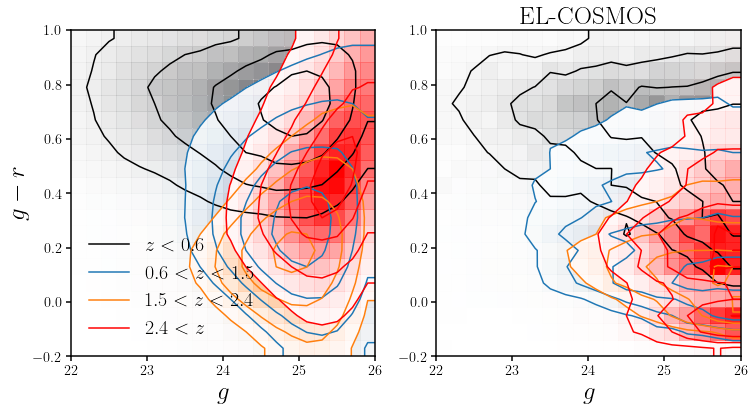

In [13]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)

DFM.hist2d(gals['g_kronflux_mag'][zlim0], 
           (gals['g_kronflux_mag'] - gals['r_kronflux_mag'])[zlim0], 
           range=[(22, 26), (-0.2, 1.)], color='k',
           plot_datapoints=False,
           ax=sub)
DFM.hist2d(gals['g_kronflux_mag'][zlim1], 
           (gals['g_kronflux_mag'] - gals['r_kronflux_mag'])[zlim1], 
           range=[(22, 26), (-0.2, 1.)], color='C0',
           plot_datapoints=False,
           ax=sub)
DFM.hist2d(gals['g_kronflux_mag'][zlim2], 
           (gals['g_kronflux_mag'] - gals['r_kronflux_mag'])[zlim2], 
           range=[(22, 26), (-0.2, 1.)], color='C1',
           plot_datapoints=False,
           ax=sub)
DFM.hist2d(gals['g_kronflux_mag'][zlim3], 
           (gals['g_kronflux_mag'] - gals['r_kronflux_mag'])[zlim3], 
           range=[(22, 26), (-0.2, 1.)], color='r',
           plot_datapoints=False,
           ax=sub)

sub.plot([], [], c='k', label='$z < 0.6$')
sub.plot([], [], c='C0', label='$0.6 < z < 1.5$')
sub.plot([], [], c='C1', label='$1.5 < z < 2.4$')
sub.plot([], [], c='r', label='$2.4 < z$')

sub.set_xlabel('$g$', fontsize=25)
sub.set_ylabel('$g-r$', fontsize=25)
sub.legend(loc='lower left', fontsize=20)

sub = fig.add_subplot(122)
DFM.hist2d(elcosmos['g_hsc'][zlim0_elc], 
           (elcosmos['g_hsc'] - elcosmos['r_hsc'])[zlim0_elc], 
           range=[(22, 26), (-0.2, 1.)], color='k',
           plot_datapoints=False,
           ax=sub)
DFM.hist2d(elcosmos['g_hsc'][zlim1_elc], 
           (elcosmos['g_hsc'] - elcosmos['r_hsc'])[zlim1_elc], 
           range=[(22, 26), (-0.2, 1.)], color='C0',
           plot_datapoints=False,
           ax=sub)
DFM.hist2d(elcosmos['g_hsc'][zlim2_elc], 
           (elcosmos['g_hsc'] - elcosmos['r_hsc'])[zlim2_elc], 
           range=[(22, 26), (-0.2, 1.)], color='C1',
           plot_datapoints=False,
           ax=sub)
DFM.hist2d(elcosmos['g_hsc'][zlim3_elc], 
           (elcosmos['g_hsc'] - elcosmos['r_hsc'])[zlim3_elc], 
           range=[(22, 26), (-0.2, 1.)], color='r',
           plot_datapoints=False,
           ax=sub)

sub.set_xlabel('$g$', fontsize=25)
sub.set_title('EL-COSMOS', fontsize=25)

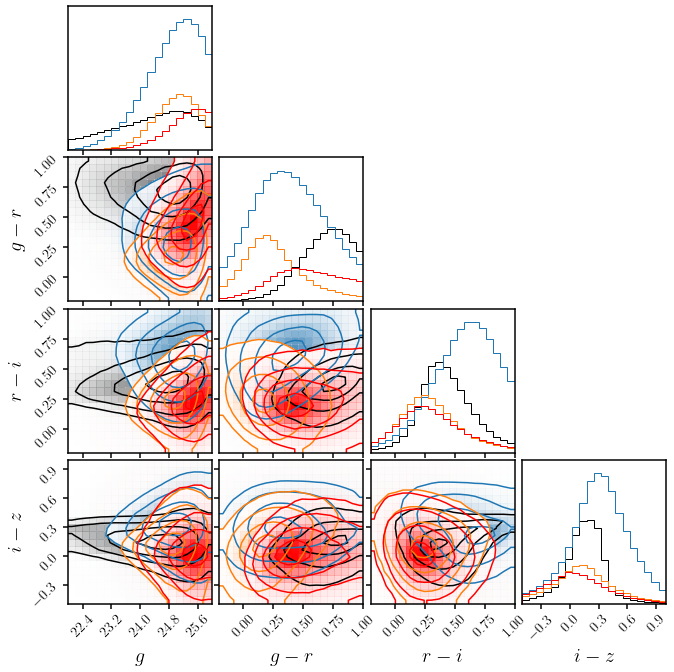

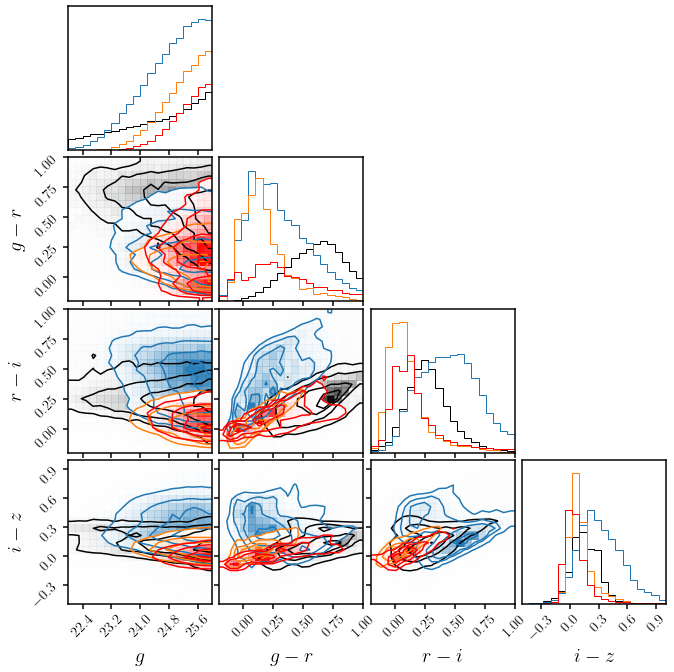

In [14]:
_data = np.array([gals['g_kronflux_mag'], 
                  (gals['g_kronflux_mag'] - gals['r_kronflux_mag']),
                  (gals['r_kronflux_mag'] - gals['i_kronflux_mag']), 
                  (gals['i_kronflux_mag'] - gals['z_kronflux_mag'])]).T

fig = DFM.corner(_data[zlim0], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='k', plot_datapoints=False)
_ = DFM.corner(_data[zlim1], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='C0', plot_datapoints=False, fig=fig)
_ = DFM.corner(_data[zlim2], 
               range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
               color='C1', plot_datapoints=False, fig=fig)
_ = DFM.corner(_data[zlim3], 
               range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
               labels=['$g$', '$g-r$', '$r-i$', '$i-z$'], label_kwargs={'fontsize': 20},
               color='r', plot_datapoints=False, fig=fig)
plt.show()

_data_elc = np.array([elcosmos['g_hsc'], 
                  (elcosmos['g_hsc'] - elcosmos['r_hsc']),
                  (elcosmos['r_hsc'] - elcosmos['i_hsc']), 
                  (elcosmos['i_hsc'] - elcosmos['z_hsc'])]).T

fig = DFM.corner(_data_elc[zlim0_elc], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='k', plot_datapoints=False)
_ = DFM.corner(_data_elc[zlim1_elc], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='C0', plot_datapoints=False, fig=fig)
_ = DFM.corner(_data_elc[zlim2_elc], 
               range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
               color='C1', plot_datapoints=False, fig=fig)
_ = DFM.corner(_data_elc[zlim3_elc], 
               range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
               labels=['$g$', '$g-r$', '$r-i$', '$i-z$'], label_kwargs={'fontsize': 20},
               color='r', plot_datapoints=False, fig=fig)

Text(0, 0.5, 'target density [${\\rm deg}^{-2}$]')

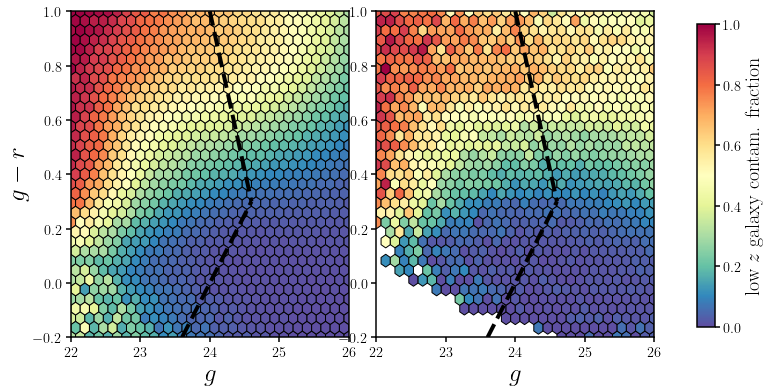

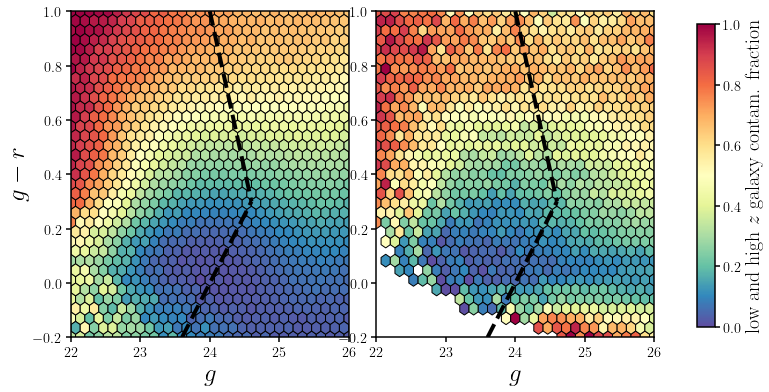

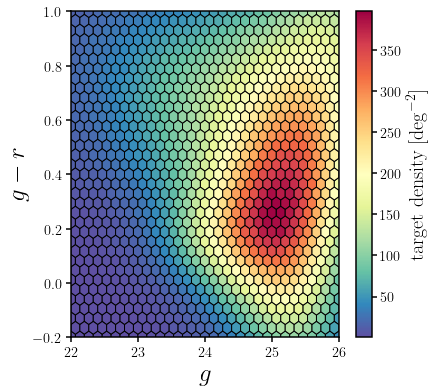

In [15]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
hb = sub.hexbin(gals['g_kronflux_mag'], (gals['g_kronflux_mag'] - gals['r_kronflux_mag']), 
                C=zlim0.astype(float), extent=(22, 26, -0.2, 1.), 
                gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=1.)
sub.plot([23.6, 24.6], [-0.2, 0.3], c='k', ls='--', lw=4)
sub.plot([24.0, 24.6], [1.0, 0.3], c='k', ls='--', lw=4)
sub.set_xlabel('$g$', fontsize=25)
sub.set_xlim(22, 26)
sub.set_ylabel('$g-r$', fontsize=25)
sub.set_ylim(-0.2, 1)

sub = fig.add_subplot(122)
hb = sub.hexbin(elcosmos['g_hsc'], (elcosmos['g_hsc'] - elcosmos['r_hsc']), 
                C=zlim0_elc.astype(float), extent=(22, 26, -0.2, 1.), 
                gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=1.)
sub.plot([23.6, 24.6], [-0.2, 0.3], c='k', ls='--', lw=4)
sub.plot([24.0, 24.6], [1.0, 0.3], c='k', ls='--', lw=4)
sub.set_xlabel('$g$', fontsize=25)
sub.set_xlim(22, 26)
sub.set_ylim(-0.2, 1)
fig.subplots_adjust(wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.ax.set_ylabel(r'low $z$ galaxy contam. fraction', fontsize=20)

fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
hb = sub.hexbin(gals['g_kronflux_mag'], (gals['g_kronflux_mag'] - gals['r_kronflux_mag']), 
                C=(zlim0 | zlim3).astype(float), extent=(22, 26, -0.2, 1.), 
                gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=1.)
sub.plot([23.6, 24.6], [-0.2, 0.3], c='k', ls='--', lw=4)
sub.plot([24.0, 24.6], [1.0, 0.3], c='k', ls='--', lw=4)
sub.set_xlabel('$g$', fontsize=25)
sub.set_xlim(22, 26)
sub.set_ylabel('$g-r$', fontsize=25)
sub.set_ylim(-0.2, 1)
sub = fig.add_subplot(122)
hb = sub.hexbin(elcosmos['g_hsc'], (elcosmos['g_hsc'] - elcosmos['r_hsc']), 
                C=(zlim0_elc | zlim3_elc).astype(float), extent=(22, 26, -0.2, 1.), 
                gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=1.)
sub.plot([23.6, 24.6], [-0.2, 0.3], c='k', ls='--', lw=4)
sub.plot([24.0, 24.6], [1.0, 0.3], c='k', ls='--', lw=4)
sub.set_xlabel('$g$', fontsize=25)
sub.set_xlim(22, 26)
sub.set_ylim(-0.2, 1)
fig.subplots_adjust(wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.ax.set_ylabel(r'low and high $z$ galaxy contam. fraction', fontsize=20)

fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
hb = sub.hexbin(gals['g_kronflux_mag'], (gals['g_kronflux_mag'] - gals['r_kronflux_mag']), 
                C=np.ones(len(gals))/50., extent=(22, 26, -0.2, 1.), reduce_C_function=np.sum, 
                gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=1.)
sub.set_xlabel('$g$', fontsize=25)
sub.set_xlim(22, 26)
sub.set_ylabel('$g-r$', fontsize=25)
sub.set_ylim(-0.2, 1)

cbar = fig.colorbar(hb)
cbar.ax.set_ylabel(r'target density [${\rm deg}^{-2}$]', fontsize=20)

This is very different than the $g$ vs $(g-r)$ distribution in EL-COSMOS: 
1. contaminating galaxies have redder $g-r > 0.3$ color
2. the locus of $z > 0.6$ galaxies are a bit fainter

1. EL-COSMOS cut: 
$$g > 23$$
$$-0.2 < g-r < 1.$$
$$g-r > 1.2 (g - 24) - 0.2$$

2. photoz cut
$$23 < g$$
$$g-r > 0.5 (g - 23.6) - 0.2$$
$$-0.2 < g-r < 0.35$$

In [16]:
cut1 = ((gals['g_kronflux_mag'] > 23) & 
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] > -0.2) & 
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] < 1) &
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] > 1.2 * (gals['g_kronflux_mag'] - 24) - 0.2))
cut2 = ((gals['g_kronflux_mag'] > 23) & 
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] > 0.5 * (gals['g_kronflux_mag'] - 23.6) - 0.2) & 
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] > -0.2) &
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] < 0.35))
print('cut1')
print('%.f targets per sq. deg' % (np.sum(cut1)/50))
print('%.2f contam. fraction' % ((np.sum(cut1 & zlim0) + np.sum(cut1 & zlim3)) / np.sum(cut1)))
print('cut2')
print('%.f targets per sq. deg' % (np.sum(cut2)/50))
print('%.2f contam. fraction' % ((np.sum(cut2 & zlim0) + np.sum(cut2 & zlim3)) / np.sum(cut2)))
print()

cut1
35837 targets per sq. deg
0.37 contam. fraction
cut2
11113 targets per sq. deg
0.12 contam. fraction



## cut1

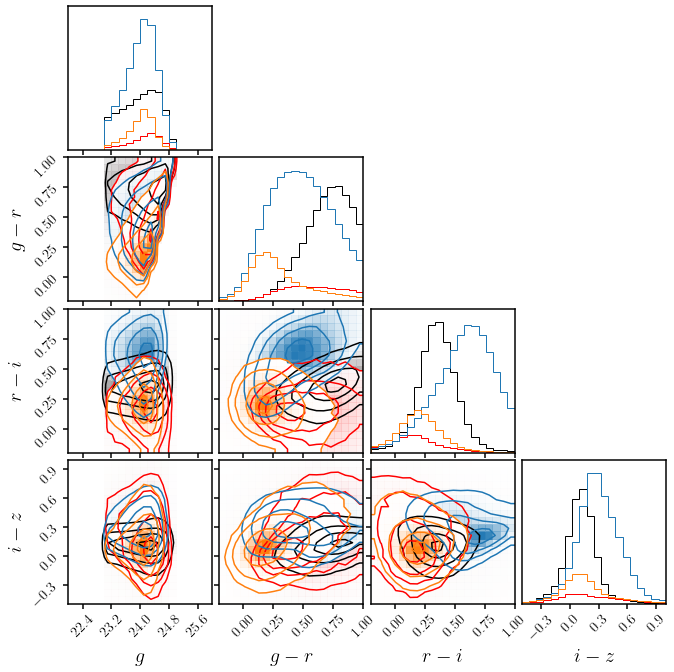

In [16]:
_data = np.array([gals['g_kronflux_mag'], 
                  (gals['g_kronflux_mag'] - gals['r_kronflux_mag']),
                  (gals['r_kronflux_mag'] - gals['i_kronflux_mag']), 
                  (gals['i_kronflux_mag'] - gals['z_kronflux_mag'])]).T

fig = DFM.corner(_data[cut1 & zlim0], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='k', plot_datapoints=False)
_ = DFM.corner(_data[cut1 & zlim3], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='r', plot_datapoints=False, fig=fig)
_ = DFM.corner(_data[cut1 & zlim1], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='C0', plot_datapoints=False, fig=fig)
_ = DFM.corner(_data[cut1 & zlim2], 
               range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
               labels=['$g$', '$g-r$', '$r-i$', '$i-z$'], label_kwargs={'fontsize': 20},
               color='C1', plot_datapoints=False, fig=fig)

# cut2

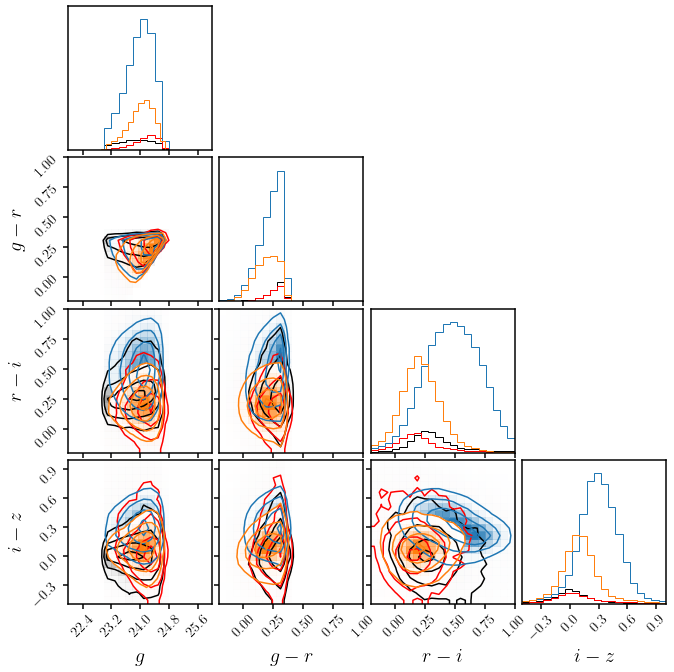

In [17]:
_data = np.array([gals['g_kronflux_mag'], 
                  (gals['g_kronflux_mag'] - gals['r_kronflux_mag']),
                  (gals['r_kronflux_mag'] - gals['i_kronflux_mag']), 
                  (gals['i_kronflux_mag'] - gals['z_kronflux_mag'])]).T

fig = DFM.corner(_data[cut2 & zlim0], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='k', plot_datapoints=False)
_ = DFM.corner(_data[cut2 & zlim3], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='r', plot_datapoints=False, fig=fig)
_ = DFM.corner(_data[cut2 & zlim1], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='C0', plot_datapoints=False, fig=fig)
_ = DFM.corner(_data[cut2 & zlim2], 
               range=[(22, 25), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
               labels=['$g$', '$g-r$', '$r-i$', '$i-z$'], label_kwargs={'fontsize': 20},
               color='C1', plot_datapoints=False, fig=fig)

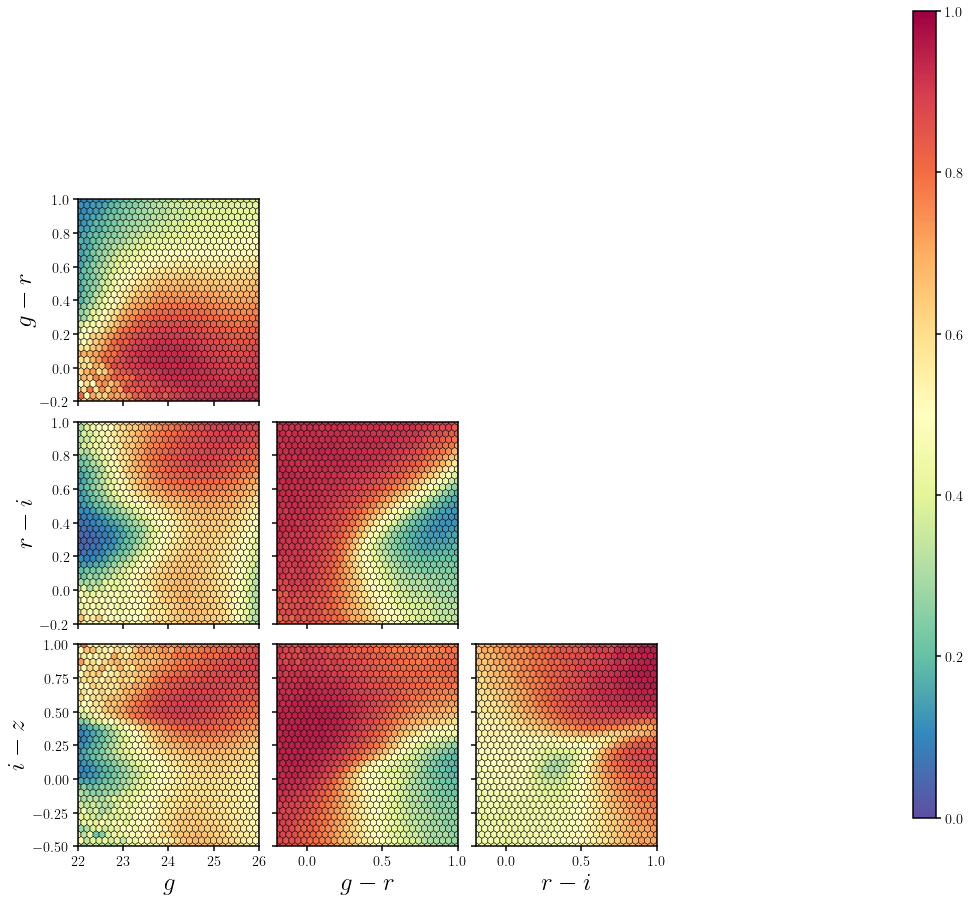

In [20]:
_data = np.array([gals['g_kronflux_mag'], 
                  (gals['g_kronflux_mag'] - gals['r_kronflux_mag']),
                  (gals['r_kronflux_mag'] - gals['i_kronflux_mag']), 
                  (gals['i_kronflux_mag'] - gals['z_kronflux_mag'])])

ranges = [(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)]
labels = ['$g$', '$g-r$', '$r-i$', '$i-z$']
fig = plt.figure(figsize=(16, 16))
for j in range(4): 
    for i in range(4): 
        if i > j: 
            sub = fig.add_subplot(4,4,4*i+j+1)
            hb = sub.hexbin(_data[j], _data[i], C=(zlim1 | zlim2).astype(float), 
                            extent=(ranges[j][0], ranges[j][1], ranges[i][0], ranges[i][1]), 
                            vmin=0., vmax=1., 
                            gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=0.5)
            sub.set_xlim(ranges[j][0], ranges[j][1])
            if j != 0: sub.set_yticklabels([])
            else: sub.set_ylabel(labels[i], fontsize=25)                
            if i < 3: sub.set_xticklabels([])
            else: sub.set_xlabel(labels[j], fontsize=25)
            sub.set_ylim(ranges[i][0], ranges[i][1])
fig.subplots_adjust(hspace=0.1, wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)

Text(0, 0.5, 'fraction of galaxies within $0.6 < z < 2.4$')

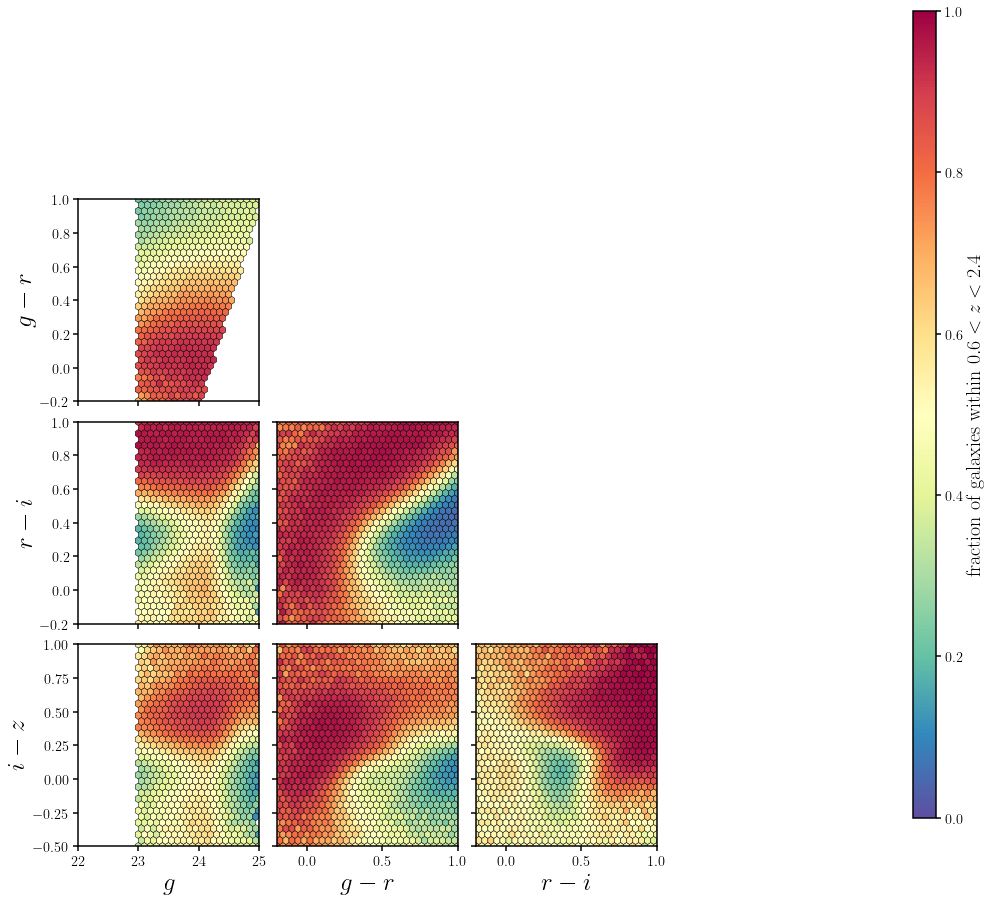

In [19]:
_data = np.array([gals['g_kronflux_mag'], 
                  (gals['g_kronflux_mag'] - gals['r_kronflux_mag']),
                  (gals['r_kronflux_mag'] - gals['i_kronflux_mag']), 
                  (gals['i_kronflux_mag'] - gals['z_kronflux_mag'])])
ranges = [(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)]
labels = ['$g$', '$g-r$', '$r-i$', '$i-z$']
fig = plt.figure(figsize=(16, 16))
for j in range(4): 
    for i in range(4): 
        if i > j: 
            sub = fig.add_subplot(4,4,4*i+j+1)
            hb = sub.hexbin(_data[j][cut1], _data[i][cut1], C=(zlim1 | zlim2).astype(float)[cut1], 
                            extent=(ranges[j][0], ranges[j][1], ranges[i][0], ranges[i][1]), 
                            vmin=0., vmax=1., 
                            gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=0.5)
            sub.set_xlim(ranges[j][0], ranges[j][1])
            if j != 0: sub.set_yticklabels([])
            else: sub.set_ylabel(labels[i], fontsize=25)                
            if i < 3: sub.set_xticklabels([])
            else: sub.set_xlabel(labels[j], fontsize=25)
            sub.set_ylim(ranges[i][0], ranges[i][1])
fig.subplots_adjust(hspace=0.1, wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.ax.set_ylabel(r'fraction of galaxies within $0.6 < z < 2.4$', fontsize=20)

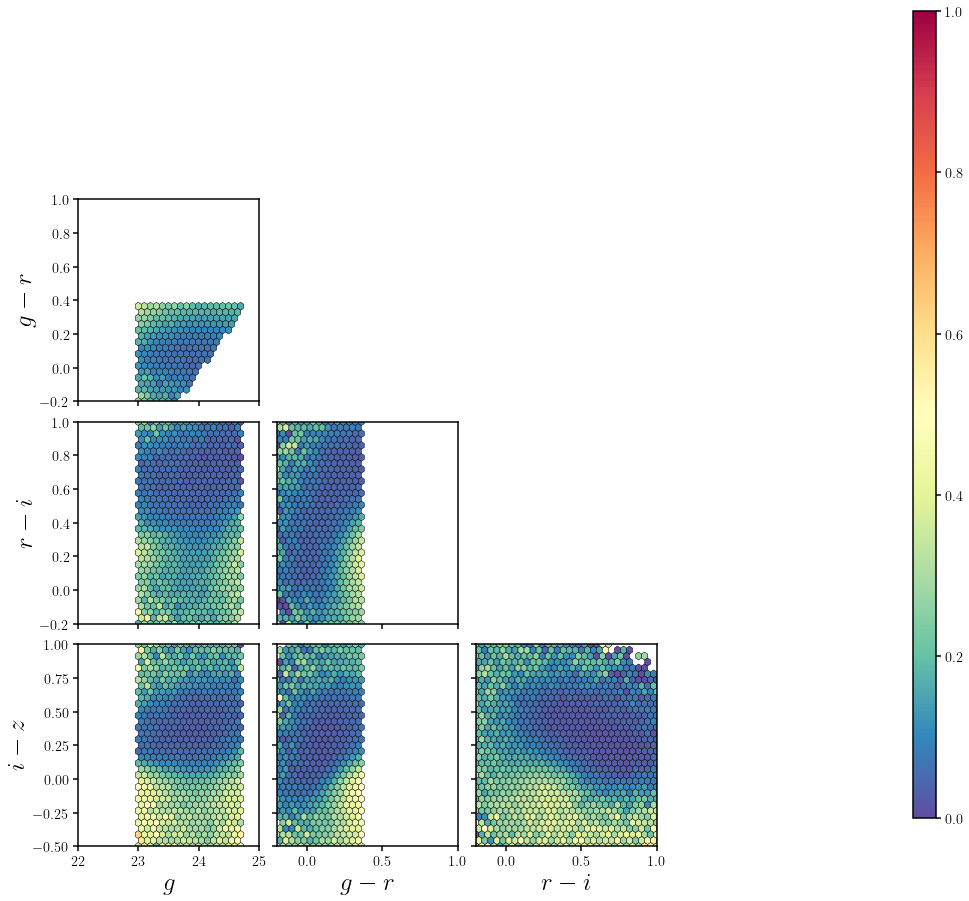

In [181]:
_data = np.array([gals['g_kronflux_mag'], 
                  (gals['g_kronflux_mag'] - gals['r_kronflux_mag']),
                  (gals['r_kronflux_mag'] - gals['i_kronflux_mag']), 
                  (gals['i_kronflux_mag'] - gals['z_kronflux_mag'])])
ranges = [(22, 25), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)]
labels = ['$g$', '$g-r$', '$r-i$', '$i-z$']
fig = plt.figure(figsize=(16, 16))
for j in range(4): 
    for i in range(4): 
        if i > j: 
            sub = fig.add_subplot(4,4,4*i+j+1)
            hb = sub.hexbin(_data[j][cut2], _data[i][cut2], C=(zlim0 | zlim3).astype(float)[cut2], 
                            extent=(ranges[j][0], ranges[j][1], ranges[i][0], ranges[i][1]), 
                            vmin=0., vmax=1., 
                            gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=0.5)
            sub.set_xlim(ranges[j][0], ranges[j][1])
            if j != 0: sub.set_yticklabels([])
            else: sub.set_ylabel(labels[i], fontsize=25)                
            if i < 3: sub.set_xticklabels([])
            else: sub.set_xlabel(labels[j], fontsize=25)
            sub.set_ylim(ranges[i][0], ranges[i][1])
fig.subplots_adjust(hspace=0.1, wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)

# November commissioning
There's a chance that we'll be able to observe a few galaxies during the november commisioning. Below I will derive the color-magnitude cutes for potential targets. 

Few things to keep in mind: 
- Only Blue and Red arm will be installed, which means we'll have wavelength range $3800 < \lambda < 10000 A$. For [OII] line this corresponds to a redshift upper limit of $z = 10000/3727 - 1 = 1.68$

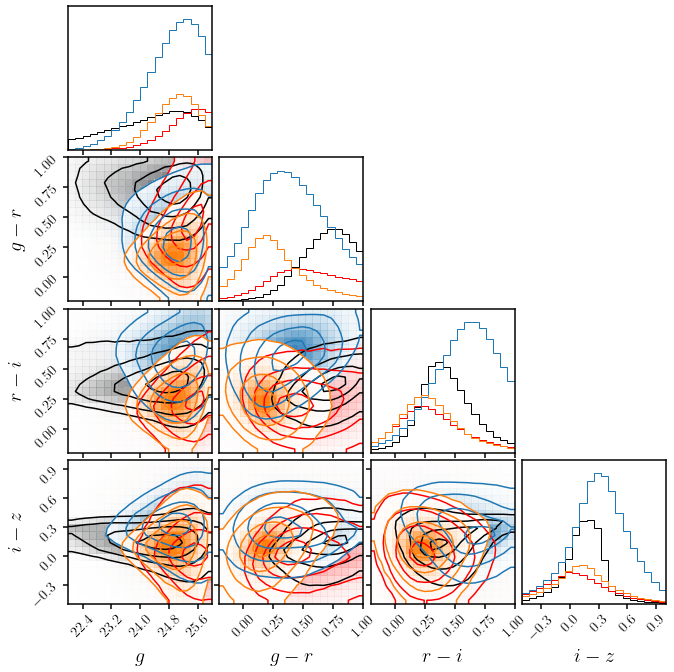

In [21]:
_data = np.array([gals['g_kronflux_mag'], 
                  (gals['g_kronflux_mag'] - gals['r_kronflux_mag']),
                  (gals['r_kronflux_mag'] - gals['i_kronflux_mag']), 
                  (gals['i_kronflux_mag'] - gals['z_kronflux_mag'])]).T

fig = DFM.corner(_data[zlim0], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='k', plot_datapoints=False)
_ = DFM.corner(_data[zlim3], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='r', plot_datapoints=False, fig=fig)
_ = DFM.corner(_data[zlim1], 
                 range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
                 color='C0', plot_datapoints=False, fig=fig)
_ = DFM.corner(_data[zlim2], 
               range=[(22, 26), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)],
               labels=['$g$', '$g-r$', '$r-i$', '$i-z$'], label_kwargs={'fontsize': 20},
               color='C1', plot_datapoints=False, fig=fig)

Text(0, 0.5, 'fraction of galaxies $0.6 < z < 1.65$')

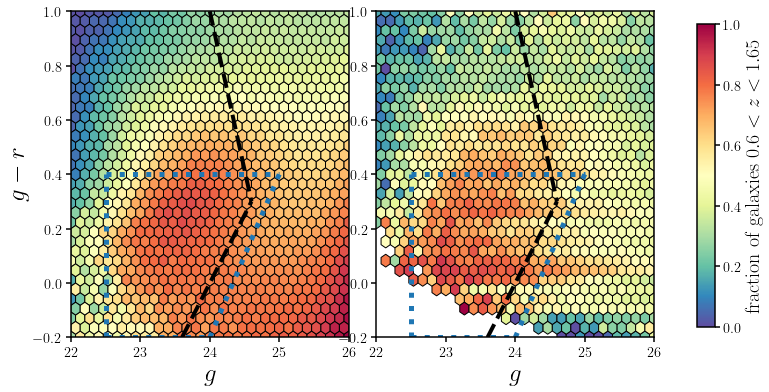

In [29]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
hb = sub.hexbin(gals['g_kronflux_mag'], (gals['g_kronflux_mag'] - gals['r_kronflux_mag']), 
                C=((gals['photoz_best'] > 0.6) & (gals['photoz_best'] < 1.65)).astype(float), extent=(22, 26, -0.2, 1.), 
                gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=1.)
sub.plot([23.6, 24.6], [-0.2, 0.3], c='k', ls='--', lw=4)
sub.plot([24.0, 24.6], [1.0, 0.3], c='k', ls='--', lw=4)

sub.plot([22.5, 25.], [0.4, 0.4], c='C0', ls=':', lw=5)
sub.plot([22.5, 22.5], [-0.2, 0.4], c='C0', ls=':', lw=5)
sub.plot([22.5, 24.], [-0.2, -0.2], c='C0', ls=':', lw=5)
sub.plot([24., 25.], [-0.2, 0.4], c='C0', ls=':', lw=5)

sub.set_xlabel('$g$', fontsize=25)
sub.set_xlim(22, 26)
sub.set_ylabel('$g-r$', fontsize=25)
sub.set_ylim(-0.2, 1)


sub = fig.add_subplot(122)
hb = sub.hexbin(elcosmos['g_hsc'], (elcosmos['g_hsc'] - elcosmos['r_hsc']), 
                C=((elcosmos['z_photo'] > 0.6) & (elcosmos['z_photo'] < 1.65)).astype(float), extent=(22, 26, -0.2, 1.), 
                gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=1.)
sub.plot([23.6, 24.6], [-0.2, 0.3], c='k', ls='--', lw=4)
sub.plot([24.0, 24.6], [1.0, 0.3], c='k', ls='--', lw=4)

sub.plot([22.5, 25.], [0.4, 0.4], c='C0', ls=':', lw=5)
sub.plot([22.5, 22.5], [-0.2, 0.4], c='C0', ls=':', lw=5)
sub.plot([22.5, 24.], [-0.2, -0.2], c='C0', ls=':', lw=5)
sub.plot([24., 25.], [-0.2, 0.4], c='C0', ls=':', lw=5)

sub.set_xlabel('$g$', fontsize=25)
sub.set_xlim(22, 26)
sub.set_ylim(-0.2, 1)
fig.subplots_adjust(wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.ax.set_ylabel(r'fraction of galaxies $0.6 < z < 1.65$', fontsize=20)


In [54]:
cut3 = ((gals['g_kronflux_mag'] > 22.5) & 
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] > 0.5 * (gals['g_kronflux_mag'] - 24.0) - 0.2) & 
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] > -0.2) &
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] < 0.4) & 
        (gals['i_kronflux_mag'] - gals['z_kronflux_mag'] > 0.5*(gals['g_kronflux_mag'] - gals['r_kronflux_mag'])))
cut3_elc = ((elcosmos['g_hsc'] > 22.5) & 
        (elcosmos['g_hsc'] - elcosmos['r_hsc'] > 0.5 * (elcosmos['g_hsc'] - 24.0) - 0.2) & 
        (elcosmos['g_hsc'] - elcosmos['r_hsc'] > -0.2) &
        (elcosmos['g_hsc'] - elcosmos['r_hsc'] < 0.4) &         
            (elcosmos['i_hsc'] - elcosmos['z_hsc'] > 0.5*(elcosmos['g_hsc'] - elcosmos['r_hsc'])))

print('cut3')
print('%.f targets per sq. deg' % (np.sum(cut3)/50))
print('%.2f contam. fraction' % ((np.sum(cut3 & zlim0) + np.sum(cut3 & zlim3)) / np.sum(cut2)))
print('%.2f contam. fraction (EL-COSMOS)' % ((np.sum(cut3_elc & zlim0_elc) + np.sum(cut3_elc & zlim3_elc)) / np.sum(cut3_elc)))
print()

cut3
16087 targets per sq. deg
0.10 contam. fraction
0.01 contam. fraction (EL-COSMOS)



In [55]:
cut4 = ((gals['g_kronflux_mag'] > 22.5) & 
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] > 0.5 * (gals['g_kronflux_mag'] - 24.0) - 0.2) & 
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] > -0.2) &
        (gals['g_kronflux_mag'] - gals['r_kronflux_mag'] < 0.4) & 
        (gals['i_kronflux_mag'] - gals['z_kronflux_mag'] > -1.4*(gals['r_kronflux_mag'] - gals['i_kronflux_mag']) + 0.2))
cut4_elc = ((elcosmos['g_hsc'] > 22.5) & 
        (elcosmos['g_hsc'] - elcosmos['r_hsc'] > 0.5 * (elcosmos['g_hsc'] - 24.0) - 0.2) & 
        (elcosmos['g_hsc'] - elcosmos['r_hsc'] > -0.2) &
        (elcosmos['g_hsc'] - elcosmos['r_hsc'] < 0.4) &         
            (elcosmos['i_hsc'] - elcosmos['z_hsc'] > -1.4*(elcosmos['r_hsc'] - elcosmos['i_hsc']) + 0.2))

print('cut4')
print('%.f targets per sq. deg' % (np.sum(cut4)/50))
print('%.2f contam. fraction' % ((np.sum(cut4 & zlim0) + np.sum(cut4 & zlim3)) / np.sum(cut4)))
print('%.2f contam. fraction (EL-COSMOS)' % ((np.sum(cut4_elc & zlim0_elc) + np.sum(cut4_elc & zlim3_elc)) / np.sum(cut4_elc)))
print()

cut4
21506 targets per sq. deg
0.12 contam. fraction
0.10 contam. fraction (EL-COSMOS)



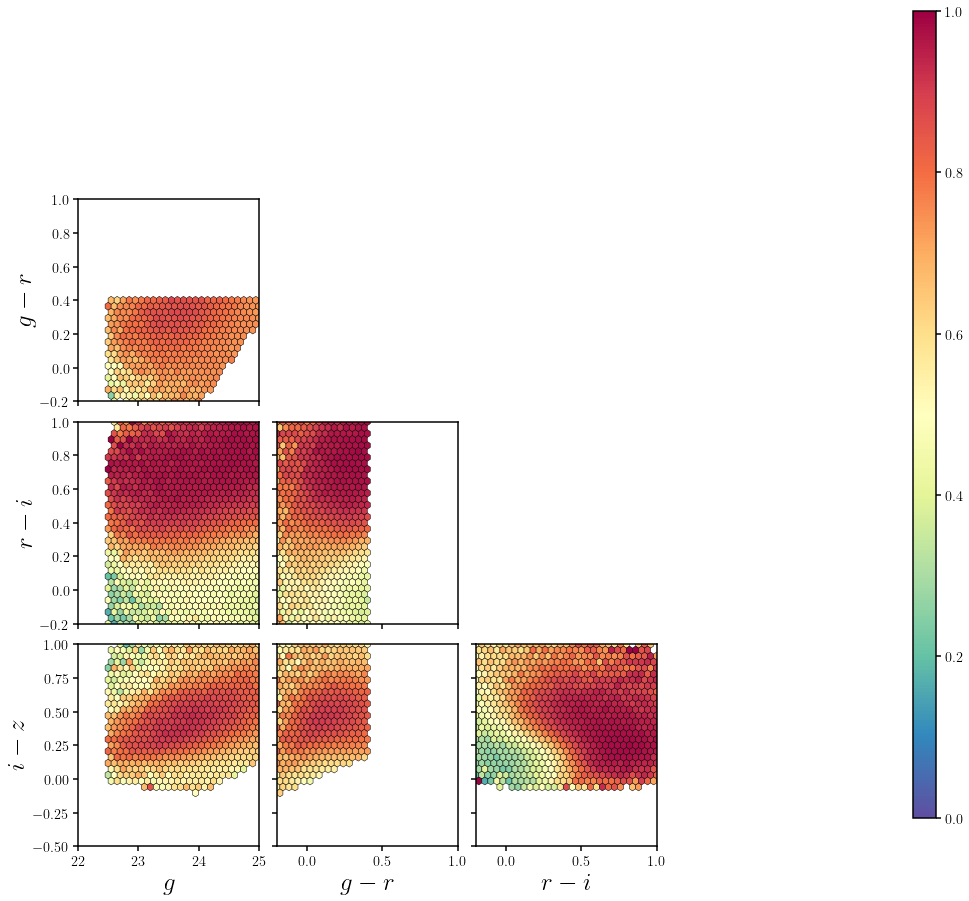

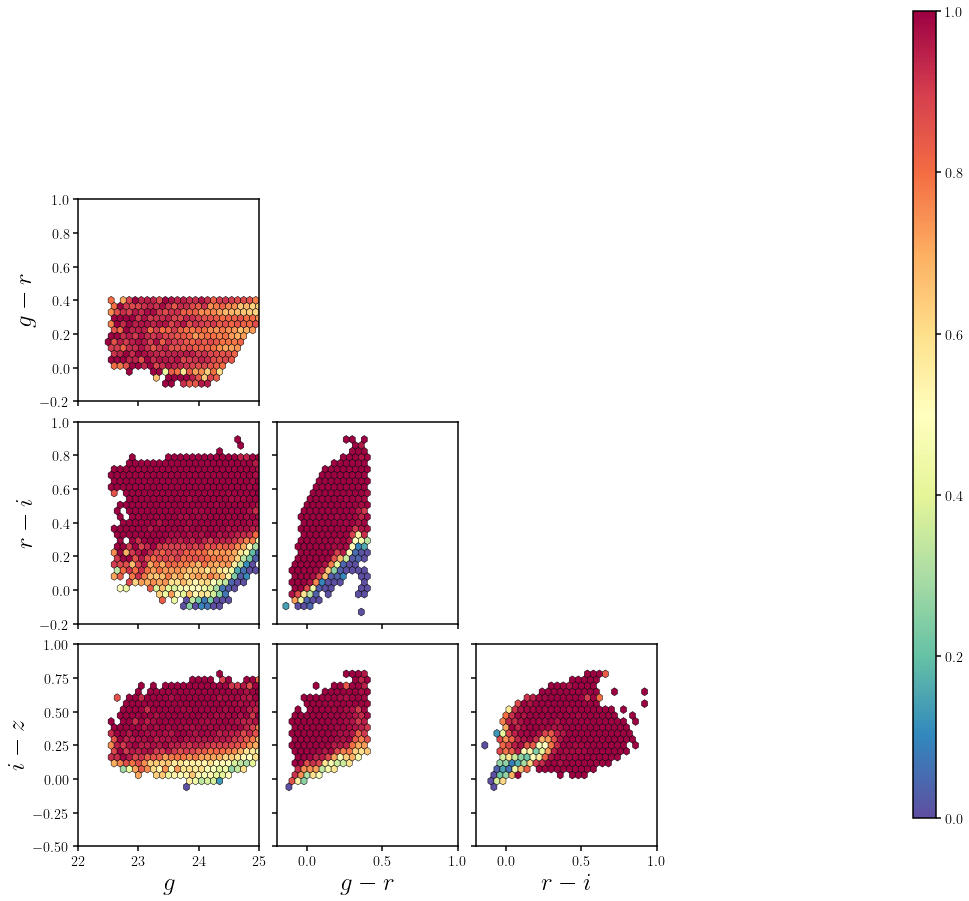

In [56]:
_data = np.array([gals['g_kronflux_mag'], 
                  (gals['g_kronflux_mag'] - gals['r_kronflux_mag']),
                  (gals['r_kronflux_mag'] - gals['i_kronflux_mag']), 
                  (gals['i_kronflux_mag'] - gals['z_kronflux_mag'])])
ranges = [(22, 25), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)]
labels = ['$g$', '$g-r$', '$r-i$', '$i-z$']
fig = plt.figure(figsize=(16, 16))
for j in range(4): 
    for i in range(4): 
        if i > j: 
            sub = fig.add_subplot(4,4,4*i+j+1)
            hb = sub.hexbin(_data[j][cut3], _data[i][cut3], 
                            C=((gals['photoz_best'] > 0.6) & (gals['photoz_best'] < 1.65)).astype(float)[cut3], 
                            extent=(ranges[j][0], ranges[j][1], ranges[i][0], ranges[i][1]), 
                            vmin=0., vmax=1., 
                            gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=0.5)
            sub.set_xlim(ranges[j][0], ranges[j][1])
            if j != 0: sub.set_yticklabels([])
            else: sub.set_ylabel(labels[i], fontsize=25)                
            if i < 3: sub.set_xticklabels([])
            else: sub.set_xlabel(labels[j], fontsize=25)
            sub.set_ylim(ranges[i][0], ranges[i][1])
fig.subplots_adjust(hspace=0.1, wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)

plt.show()


_data = np.array([elcosmos['g_hsc'], 
                  (elcosmos['g_hsc'] - elcosmos['r_hsc']),
                  (elcosmos['r_hsc'] - elcosmos['i_hsc']), 
                  (elcosmos['i_hsc'] - elcosmos['z_hsc'])])

fig = plt.figure(figsize=(16, 16))
for j in range(4): 
    for i in range(4): 
        if i > j: 
            sub = fig.add_subplot(4,4,4*i+j+1)
            hb = sub.hexbin(_data[j][cut3_elc], _data[i][cut3_elc], 
                            C=((elcosmos['z_photo'] > 0.6) & (elcosmos['z_photo'] < 1.65)).astype(float)[cut3_elc], 
                            extent=(ranges[j][0], ranges[j][1], ranges[i][0], ranges[i][1]), 
                            vmin=0., vmax=1., 
                            gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=0.5)
            sub.set_xlim(ranges[j][0], ranges[j][1])
            if j != 0: sub.set_yticklabels([])
            else: sub.set_ylabel(labels[i], fontsize=25)                
            if i < 3: sub.set_xticklabels([])
            else: sub.set_xlabel(labels[j], fontsize=25)
            sub.set_ylim(ranges[i][0], ranges[i][1])
fig.subplots_adjust(hspace=0.1, wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)

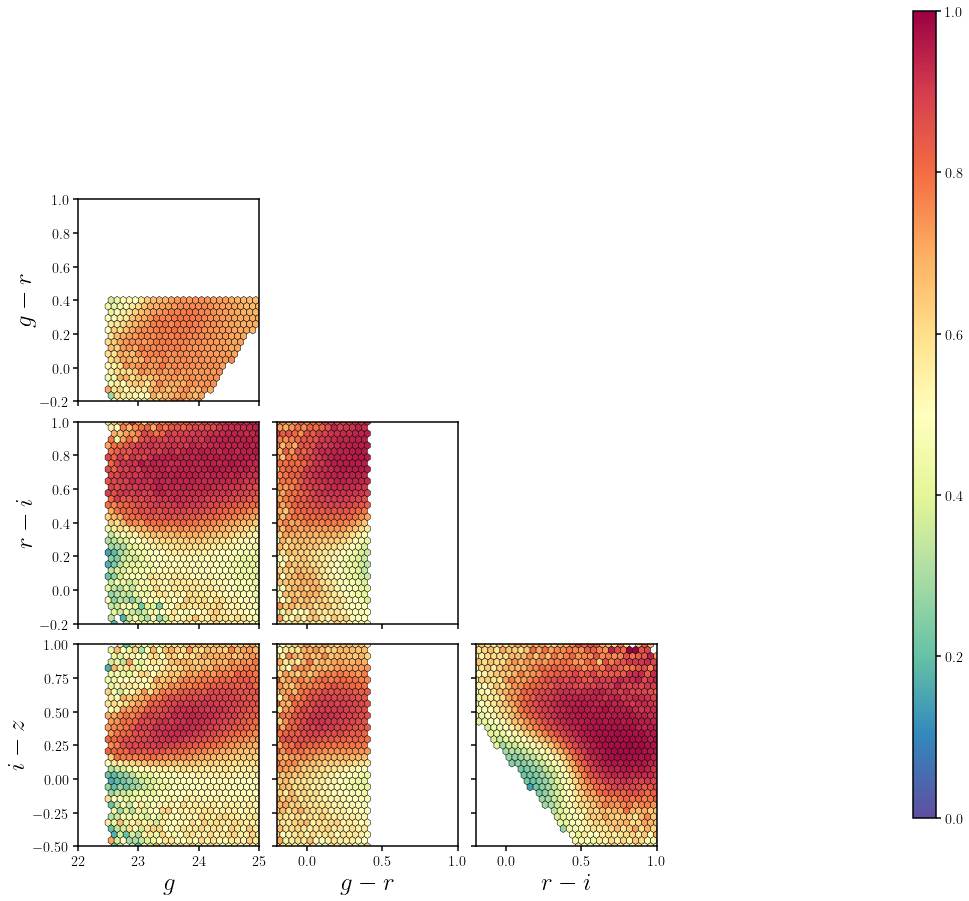

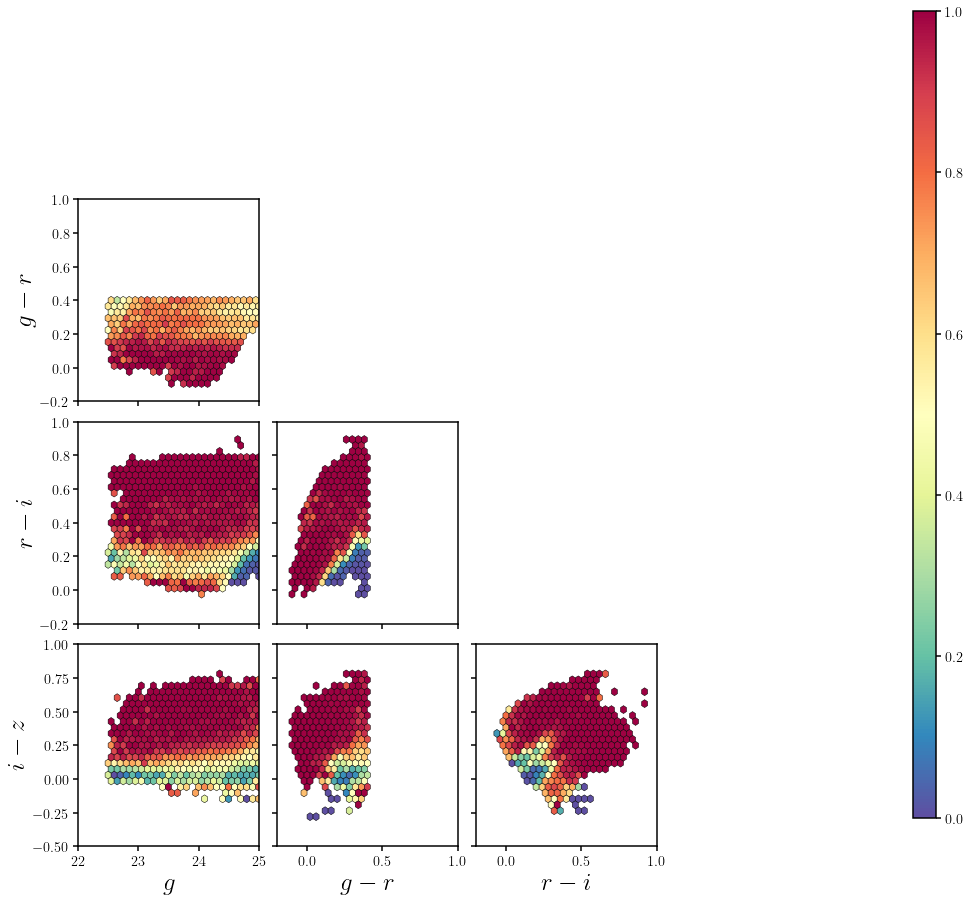

In [47]:
_data = np.array([gals['g_kronflux_mag'], 
                  (gals['g_kronflux_mag'] - gals['r_kronflux_mag']),
                  (gals['r_kronflux_mag'] - gals['i_kronflux_mag']), 
                  (gals['i_kronflux_mag'] - gals['z_kronflux_mag'])])
ranges = [(22, 25), (-0.2, 1.), (-0.2, 1.), (-0.5, 1.)]
labels = ['$g$', '$g-r$', '$r-i$', '$i-z$']
fig = plt.figure(figsize=(16, 16))
for j in range(4): 
    for i in range(4): 
        if i > j: 
            sub = fig.add_subplot(4,4,4*i+j+1)
            hb = sub.hexbin(_data[j][cut4], _data[i][cut4], 
                            C=((gals['photoz_best'] > 0.6) & (gals['photoz_best'] < 1.65)).astype(float)[cut4], 
                            extent=(ranges[j][0], ranges[j][1], ranges[i][0], ranges[i][1]), 
                            vmin=0., vmax=1., 
                            gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=0.5)
            sub.set_xlim(ranges[j][0], ranges[j][1])
            if j != 0: sub.set_yticklabels([])
            else: sub.set_ylabel(labels[i], fontsize=25)                
            if i < 3: sub.set_xticklabels([])
            else: sub.set_xlabel(labels[j], fontsize=25)
            sub.set_ylim(ranges[i][0], ranges[i][1])
fig.subplots_adjust(hspace=0.1, wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)

plt.show()


_data = np.array([elcosmos['g_hsc'], 
                  (elcosmos['g_hsc'] - elcosmos['r_hsc']),
                  (elcosmos['r_hsc'] - elcosmos['i_hsc']), 
                  (elcosmos['i_hsc'] - elcosmos['z_hsc'])])

fig = plt.figure(figsize=(16, 16))
for j in range(4): 
    for i in range(4): 
        if i > j: 
            sub = fig.add_subplot(4,4,4*i+j+1)
            hb = sub.hexbin(_data[j][cut4_elc], _data[i][cut4_elc], 
                            C=((elcosmos['z_photo'] > 0.6) & (elcosmos['z_photo'] < 1.65)).astype(float)[cut4_elc], 
                            extent=(ranges[j][0], ranges[j][1], ranges[i][0], ranges[i][1]), 
                            vmin=0., vmax=1., 
                            gridsize=30, mincnt=5, cmap='Spectral_r', edgecolors='k', linewidth=0.5)
            sub.set_xlim(ranges[j][0], ranges[j][1])
            if j != 0: sub.set_yticklabels([])
            else: sub.set_ylabel(labels[i], fontsize=25)                
            if i < 3: sub.set_xticklabels([])
            else: sub.set_xlabel(labels[j], fontsize=25)
            sub.set_ylim(ranges[i][0], ranges[i][1])
fig.subplots_adjust(hspace=0.1, wspace=0.1, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)